In [ ]:
import os
import pandas as pd
from pydub import AudioSegment

def convert_audio(input_dir, output_dir, tsv_file, audio_format="mp3"):
    """Convert audio files to WAV format and align with metadata."""
    metadata = pd.read_csv(tsv_file, sep="\t")
    valid_data = metadata[metadata['client_id'].notnull()]  # Filter valid entries
    
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    for _, row in valid_data.iterrows():
        file_path = os.path.join(input_dir, row['path'])
        if file_path.endswith(audio_format):
            audio = AudioSegment.from_file(file_path, format=audio_format)
            wav_path = os.path.join(output_dir, os.path.basename(row['path']).replace(audio_format, 'wav'))
            audio.set_frame_rate(16000).set_channels(1).export(wav_path, format="wav")
            row['wav_path'] = wav_path  # Add the converted path to metadata
            
    return valid_data

# Convert Common Voice MP3s
input_dir = "/path/to/commonvoice/audio"
output_dir = "/path/to/output/wav_files"
tsv_file = "/path/to/validated.tsv"
converted_metadata = convert_audio(input_dir, output_dir, tsv_file)

# Save updated metadata
converted_metadata.to_csv("aligned_commonvoice_metadata.csv", index=False)


In [1]:
import os
import pandas as pd
import shutil

def copy_validated_audios(tsv_file, source_dir, dest_dir):
    """
    Copy audio files specified in the validated.tsv file to a separate directory.

    Args:
        tsv_file (str): Path to the validated.tsv file.
        source_dir (str): Path to the directory containing the .mp3 files.
        dest_dir (str): Path to the directory where validated files will be stored.
    """
    # Load the validated.tsv file
    validated_data = pd.read_csv(tsv_file, sep='\t')
    
    # Ensure destination directory exists
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)

    # Get the filenames of validated audio files
    validated_files = validated_data['path'].tolist()

    # Copy the matching files
    for file_name in validated_files:
        src_path = os.path.join(source_dir, file_name)
        dest_path = os.path.join(dest_dir, file_name)
        if os.path.exists(src_path):
            shutil.copy(src_path, dest_path)
            print(f"Copied: {file_name}")
        else:
            print(f"File not found: {file_name}")

# Paths
tsv_file = '/Users/TalhaZain/Downloads/SERC/cv-corpus-20.0-delta-2024-12-06/en/validated.tsv'  # Path to the validated.tsv file
source_dir = '/Users/TalhaZain/Downloads/SERC/cv-corpus-20.0-delta-2024-12-06/en/clips'   # Directory containing all .mp3 files
dest_dir = '/Users/TalhaZain/Downloads/SERC/cv-corpus-20.0-delta-2024-12-06/en/extracted_audios'  # Directory to store validated files

# Execute the function
copy_validated_audios(tsv_file, source_dir, dest_dir)


Copied: common_voice_en_41383256.mp3
Copied: common_voice_en_41823983.mp3
Copied: common_voice_en_41881685.mp3
Copied: common_voice_en_41799514.mp3
Copied: common_voice_en_41552032.mp3
Copied: common_voice_en_41827319.mp3
Copied: common_voice_en_41526838.mp3
Copied: common_voice_en_41435787.mp3
Copied: common_voice_en_41633128.mp3
Copied: common_voice_en_41586424.mp3
Copied: common_voice_en_41489529.mp3
Copied: common_voice_en_41469700.mp3
Copied: common_voice_en_41517336.mp3
Copied: common_voice_en_41423014.mp3
Copied: common_voice_en_41518962.mp3
Copied: common_voice_en_41592181.mp3
Copied: common_voice_en_41532689.mp3
Copied: common_voice_en_41503591.mp3
Copied: common_voice_en_41816931.mp3
Copied: common_voice_en_41267069.mp3
Copied: common_voice_en_41659267.mp3
Copied: common_voice_en_41629760.mp3
Copied: common_voice_en_41674821.mp3
Copied: common_voice_en_41577054.mp3
Copied: common_voice_en_41583225.mp3
Copied: common_voice_en_41662681.mp3
Copied: common_voice_en_41486401.mp3
C

In [2]:
import os
import pandas as pd
import shutil

def organize_validated_data(tsv_path, audio_dir, output_dir, transcription_dir=None):
    """
    Organize validated audio files and optionally their transcriptions.

    Args:
        tsv_path (str): Path to validated.tsv file.
        audio_dir (str): Directory containing all .mp3 audio files.
        output_dir (str): Directory to store validated audio files.
        transcription_dir (str): Directory containing transcription files (optional).
    """
    # Read the validated.tsv file
    validated_data = pd.read_csv(tsv_path, sep='\t')
    
    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Iterate through each file listed in validated.tsv
    for _, row in validated_data.iterrows():
        file_name = row['path']  # Column 'path' contains audio filenames
        source_path = os.path.join(audio_dir, file_name)
        dest_path = os.path.join(output_dir, file_name)

        if os.path.exists(source_path):
            shutil.copy(source_path, dest_path)
            print(f"Copied: {file_name}")
        else:
            print(f"File not found: {file_name}")

    # Optionally copy transcription files if provided
    if transcription_dir:
        transcription_output_dir = os.path.join(output_dir, "transcriptions")
        os.makedirs(transcription_output_dir, exist_ok=True)

        for txt_file in os.listdir(transcription_dir):
            if txt_file.endswith(".txt"):
                shutil.copy(os.path.join(transcription_dir, txt_file), transcription_output_dir)
                print(f"Copied transcription: {txt_file}")

# Define paths
tsv_file = '/Users/TalhaZain/Downloads/SERC/Combined_files/extracted_audios/validated.tsv'  # Path to validated.tsv
audio_directory = '/Users/TalhaZain/Downloads/SERC/Combined_files/extracted_audios'  # Directory containing all .mp3 files
output_directory = '/Users/TalhaZain/Downloads/SERC/Combined_files/extracted_audios/Output'  # Directory to store validated files
transcription_directory = '/Users/TalhaZain/Downloads/SERC/Combined_files/extracted_audios/Transcription'  # Optional transcription directory

# Organize the data
organize_validated_data(tsv_file, audio_directory, output_directory, transcription_directory)


Copied: common_voice_en_41383256.mp3
Copied: common_voice_en_41823983.mp3
Copied: common_voice_en_41881685.mp3
Copied: common_voice_en_41799514.mp3
Copied: common_voice_en_41552032.mp3
Copied: common_voice_en_41827319.mp3
Copied: common_voice_en_41526838.mp3
Copied: common_voice_en_41435787.mp3
Copied: common_voice_en_41633128.mp3
Copied: common_voice_en_41586424.mp3
Copied: common_voice_en_41489529.mp3
Copied: common_voice_en_41469700.mp3
Copied: common_voice_en_41517336.mp3
Copied: common_voice_en_41423014.mp3
Copied: common_voice_en_41518962.mp3
Copied: common_voice_en_41592181.mp3
Copied: common_voice_en_41532689.mp3
Copied: common_voice_en_41503591.mp3
Copied: common_voice_en_41816931.mp3
Copied: common_voice_en_41267069.mp3
Copied: common_voice_en_41659267.mp3
Copied: common_voice_en_41629760.mp3
Copied: common_voice_en_41674821.mp3
Copied: common_voice_en_41577054.mp3
Copied: common_voice_en_41583225.mp3
Copied: common_voice_en_41662681.mp3
Copied: common_voice_en_41486401.mp3
C

In [6]:
import os
import shutil

def organize_flac_and_transcriptions(audio_dir, transcription_dir, output_dir):
    """
    Organize .flac files and their corresponding transcription segments.
    
    Args:
        audio_dir (str): Directory containing .flac files.
        transcription_dir (str): Directory containing .txt transcription files.
        output_dir (str): Directory to store organized .flac files and matched transcriptions.
    """
    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)
    trans_output_dir = os.path.join(output_dir, "transcriptions")
    os.makedirs(trans_output_dir, exist_ok=True)

    print(f"Audio Directory: {audio_dir}")
    print(f"Transcription Directory: {transcription_dir}")
    print(f"Output Directory: {output_dir}")

    # Process each .flac file
    for flac_file in os.listdir(audio_dir):
        if flac_file.endswith(".flac"):
            print(f"Processing audio file: {flac_file}")

            # Extract base name without the extension
            base_name = flac_file.replace(".flac", "")
            # Derive the transcription file name
            chapter_id = "-".join(base_name.split("-")[:2])  # Extract the chapter ID
            transcription_file = os.path.join(transcription_dir, f"{chapter_id}.trans.txt")

            print(f"Looking for transcription: {transcription_file}")

            if os.path.exists(transcription_file):
                # Read the transcription file
                with open(transcription_file, "r") as f:
                    transcriptions = f.readlines()

                # Find the matching transcription line
                matching_transcriptions = [
                    line.strip() for line in transcriptions if line.startswith(base_name)
                ]

                if matching_transcriptions:
                    print(f"Found transcription for {flac_file}: {matching_transcriptions}")

                    # Copy the .flac file
                    flac_output_path = os.path.join(output_dir, flac_file)
                    shutil.copy(os.path.join(audio_dir, flac_file), flac_output_path)
                    print(f"Copied audio: {flac_file}")

                    # Save the matching transcription
                    transcription_output_path = os.path.join(trans_output_dir, f"{base_name}.txt")
                    with open(transcription_output_path, "w") as f:
                        f.write("\n".join(matching_transcriptions))
                    print(f"Copied transcription: {base_name}.txt")
                else:
                    print(f"No matching transcription found for: {flac_file}")
            else:
                print(f"Transcription file not found: {transcription_file}")

# Define directories
audio_directory = '/Users/TalhaZain/Downloads/SERC/Combined_files'  # Directory containing .flac files
transcription_directory = '/Users/TalhaZain/Downloads/SERC/Combined_files'  # Directory containing .txt files
output_directory = '/Users/TalhaZain/Downloads/SERC/Combined_files/organized'  # Directory to store organized files

# Run the function
organize_flac_and_transcriptions(audio_directory, transcription_directory, output_directory)


Audio Directory: /Users/TalhaZain/Downloads/SERC/Combined_files
Transcription Directory: /Users/TalhaZain/Downloads/SERC/Combined_files
Output Directory: /Users/TalhaZain/Downloads/SERC/Combined_files/organized
Processing audio file: 3000-15664-0005.flac
Looking for transcription: /Users/TalhaZain/Downloads/SERC/Combined_files/3000-15664.trans.txt
Found transcription for 3000-15664-0005.flac: ['3000-15664-0005 ONE BLANKET WILL BE ENOUGH TO CARRY OR YOU MAY FOREGO THE PLEASURE AND BURDEN ALTOGETHER AS WOOD FOR FIRES IS EVERYWHERE ABUNDANT']
Copied audio: 3000-15664-0005.flac
Copied transcription: 3000-15664-0005.txt
Processing audio file: 422-122949-0016.flac
Looking for transcription: /Users/TalhaZain/Downloads/SERC/Combined_files/422-122949.trans.txt
Found transcription for 422-122949-0016.flac: ['422-122949-0016 WHAT WILL THE MORAL PHILOSOPHERS WHO APPEAR AT THIS TIME HAVE TO PREACH']
Copied audio: 422-122949-0016.flac
Copied transcription: 422-122949-0016.txt
Processing audio file: 

In [7]:
import os
import pandas as pd

def create_transcription_files(tsv_path, audio_dir, output_dir):
    """
    Generate transcription files for each audio file based on validated.tsv.

    Args:
        tsv_path (str): Path to validated.tsv file.
        audio_dir (str): Directory containing validated .mp3 files.
        output_dir (str): Directory to store transcription files.
    """
    # Load validated.tsv
    validated_data = pd.read_csv(tsv_path, sep="\t")

    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Process each audio file in the audio directory
    for audio_file in os.listdir(audio_dir):
        if audio_file.endswith(".mp3"):
            # Extract base name without extension
            audio_name = audio_file.replace(".mp3", "")

            # Find the matching transcription in the TSV file
            transcription_row = validated_data[validated_data['path'] == audio_file]
            
            if not transcription_row.empty:
                transcription = transcription_row.iloc[0]['sentence']
                
                # Create a transcription file
                transcription_file = os.path.join(output_dir, f"{audio_name}.txt")
                with open(transcription_file, "w") as f:
                    f.write(transcription)
                print(f"Created transcription for {audio_file}")
            else:
                print(f"No transcription found for {audio_file}")

# Define paths
tsv_file = '/Users/TalhaZain/Downloads/SERC/Combined_files/extracted_audios/validated.tsv'  # Path to validated.tsv file
audio_directory = '/Users/TalhaZain/Downloads/SERC/Combined_files/extracted_audios'  # Directory containing .mp3 files
output_directory = '/Users/TalhaZain/Downloads/SERC/Combined_files/extracted_audios/transcriptions'  # Directory to save .txt transcription files

# Run the function
create_transcription_files(tsv_file, audio_directory, output_directory)


Created transcription for common_voice_en_41796143.mp3
Created transcription for common_voice_en_41682485.mp3
Created transcription for common_voice_en_41764882.mp3
Created transcription for common_voice_en_41291154.mp3
Created transcription for common_voice_en_41290470.mp3
Created transcription for common_voice_en_41552032.mp3
Created transcription for common_voice_en_41350495.mp3
Created transcription for common_voice_en_41469700.mp3
Created transcription for common_voice_en_41647486.mp3
Created transcription for common_voice_en_41796793.mp3
Created transcription for common_voice_en_41653632.mp3
Created transcription for common_voice_en_41290465.mp3
Created transcription for common_voice_en_41289083.mp3
Created transcription for common_voice_en_41414853.mp3
Created transcription for common_voice_en_41414884.mp3
Created transcription for common_voice_en_41765553.mp3
Created transcription for common_voice_en_41366246.mp3
Created transcription for common_voice_en_41291194.mp3
Created tr

In [6]:
pip install librosa


     |████████████████████████████████| 260 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 2.1 MB/s eta 0:00:011
     |████████████████████████████████| 204 kB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 3.1 MB/s eta 0:00:01
     |████████████████████████████████| 17.0 MB 2.0 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
tensorflow 2.16.1 requires numpy<2.0.0,>=1.23.5; python_version <= "3.11", but you have numpy 1.21.6 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install pydub


Note: you may need to restart the kernel to use updated packages.


In [12]:
import os
import pandas as pd
import librosa
import numpy as np
from pydub import AudioSegment

# Set ffmpeg paths
AudioSegment.converter = "/usr/local/bin/ffmpeg"
AudioSegment.ffprobe = "/usr/local/bin/ffprobe"

# Validate MP3 files
def validate_mp3_files(audio_dir):
    """
    Validate .mp3 files by checking their audio duration.

    Args:
        audio_dir (str): Directory containing .mp3 files.
    """
    valid_files = []
    for file in os.listdir(audio_dir):
        if file.endswith(".mp3"):
            audio_path = os.path.join(audio_dir, file)
            try:
                audio = AudioSegment.from_file(audio_path, format="mp3")
                if len(audio) > 0:
                    valid_files.append(file)
                    print(f"Valid audio file: {file} | Duration: {len(audio) / 1000} seconds")
                else:
                    print(f"Empty audio file: {file}")
            except Exception as e:
                print(f"Error with file {file}: {e}")
    return valid_files

# Convert MP3 to WAV
def convert_mp3_to_wav(mp3_dir, output_dir):
    """
    Convert .mp3 files to .wav format.

    Args:
        mp3_dir (str): Directory containing .mp3 files.
        output_dir (str): Directory to save .wav files.
    """
    os.makedirs(output_dir, exist_ok=True)
    for file in os.listdir(mp3_dir):
        if file.endswith(".mp3"):
            mp3_path = os.path.join(mp3_dir, file)
            wav_path = os.path.join(output_dir, file.replace(".mp3", ".wav"))
            try:
                audio = AudioSegment.from_file(mp3_path, format="mp3")
                audio.export(wav_path, format="wav")
                print(f"Converted: {file} to WAV format.")
            except Exception as e:
                print(f"Error converting {file}: {e}")

# Extract Features
def extract_features(audio_path, sr=16000):
    """
    Extract features (MFCCs, pitch, energy, zero-crossing rate) from an audio file.

    Args:
        audio_path (str): Path to the audio file.
        sr (int): Sampling rate for loading the audio.
        
    Returns:
        features (numpy.ndarray): Extracted features (frames x features), or None if extraction fails.
    """
    try:
        y, sr = librosa.load(audio_path, sr=sr)
        if len(y) == 0:
            raise ValueError("Empty audio file")
        
        # Extract features
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T
        pitch, _ = librosa.piptrack(y=y, sr=sr)
        pitch = np.mean(pitch, axis=0).reshape(1, -1).T
        energy = librosa.feature.rms(y=y).T
        zcr = librosa.feature.zero_crossing_rate(y=y).T

        # Combine all features
        features = np.hstack([mfccs, pitch, energy, zcr])
        return features
    except Exception as e:
        print(f"Error extracting features from {audio_path}: {e}")
        return None

# Process Dataset
def process_dataset(audio_dir, output_csv, sr=16000):
    """
    Process all audio files in a directory and save extracted features to a CSV.

    Args:
        audio_dir (str): Directory containing audio files.
        output_csv (str): Path to save the extracted features as a CSV.
        sr (int): Sampling rate for loading audio.
    """
    all_features = []
    file_ids = []

    for file in os.listdir(audio_dir):
        if file.endswith(".flac") or file.endswith(".wav"):
            audio_path = os.path.join(audio_dir, file)
            print(f"Processing: {audio_path}")
            features = extract_features(audio_path, sr)
            if features is not None:
                all_features.append(features.mean(axis=0))  
                file_ids.append(file)
            else:
                print(f"Skipping {file} due to extraction failure.")

    # Save to CSV
    if all_features:
        df = pd.DataFrame(all_features, columns=[f"feature_{i}" for i in range(all_features[0].shape[0])])
        df['file_id'] = file_ids
        df.to_csv(output_csv, index=False)
        print(f"Features saved to {output_csv}")
    else:
        print("No valid features extracted. Check your dataset for issues.")

# Define Paths
wav_output_dir = '/Users/TalhaZain/Downloads/SERC/Combined_files/wav_audios'  
flac_audio_dir = '/Users/TalhaZain/Downloads/SERC/Combined_files/flac_audios'  
mp3_audio_dir = '/Users/TalhaZain/Downloads/SERC/Combined_files/mp3_audios'    
output_flac_csv = '/Users/TalhaZain/Downloads/SERC/Combined_files/flac_features.csv'  
output_mp3_csv = '/Users/TalhaZain/Downloads/SERC/Combined_files/mp3_features.csv'   


# Validate MP3 Files
valid_mp3_files = validate_mp3_files(mp3_audio_dir)
print(f"Valid MP3 files: {len(valid_mp3_files)}")

# Convert MP3 to WAV
convert_mp3_to_wav(mp3_audio_dir, wav_output_dir)

# Process FLAC and WAV Datasets
process_dataset(flac_audio_dir, output_flac_csv)
process_dataset(wav_output_dir, output_mp3_csv)


Valid audio file: common_voice_en_41796143.mp3 | Duration: 4.32 seconds
Valid audio file: common_voice_en_41682485.mp3 | Duration: 7.344 seconds
Valid audio file: common_voice_en_41764882.mp3 | Duration: 5.148 seconds
Valid audio file: common_voice_en_41291154.mp3 | Duration: 4.248 seconds
Valid audio file: common_voice_en_41290470.mp3 | Duration: 6.66 seconds
Valid audio file: common_voice_en_41552032.mp3 | Duration: 6.228 seconds
Valid audio file: common_voice_en_41350495.mp3 | Duration: 5.076 seconds
Valid audio file: common_voice_en_41469700.mp3 | Duration: 8.604 seconds
Valid audio file: common_voice_en_41647486.mp3 | Duration: 5.976 seconds
Valid audio file: common_voice_en_41796793.mp3 | Duration: 4.608 seconds
Valid audio file: common_voice_en_41653632.mp3 | Duration: 5.508 seconds
Valid audio file: common_voice_en_41290465.mp3 | Duration: 5.868 seconds
Valid audio file: common_voice_en_41289083.mp3 | Duration: 2.736 seconds
Valid audio file: common_voice_en_41414853.mp3 | Dura

In [13]:
import pandas as pd
import networkx as nx
import os
import numpy as np

def construct_utterance_graph(features, output_dir, file_id):
    """
    Construct an utterance-level graph from extracted features.
    
    Args:
        features (numpy.ndarray): Feature matrix (frames x features).
        output_dir (str): Directory to save the graph.
        file_id (str): Unique identifier for the file.
    """
    G = nx.DiGraph()
    
    # Add nodes (frames)
    for i, frame_features in enumerate(features):
        G.add_node(i, features=frame_features.tolist())
    
    # Add edges (connect consecutive frames)
    for i in range(len(features) - 1):
        G.add_edge(i, i + 1)
    
    # Save the graph
    graph_path = os.path.join(output_dir, f"{file_id}.gpickle")
    nx.write_gpickle(G, graph_path)
    print(f"Saved utterance graph: {graph_path}")

def process_features_for_graphs(features_csv, output_dir):
    """
    Process a feature CSV and construct utterance-level graphs for each file.
    
    Args:
        features_csv (str): Path to the feature CSV.
        output_dir (str): Directory to save constructed graphs.
    """
    os.makedirs(output_dir, exist_ok=True)
    features_data = pd.read_csv(features_csv)
    
    for _, row in features_data.iterrows():
        file_id = row['file_id']
        features = row.drop('file_id').values.reshape(-1, 1)  
        construct_utterance_graph(features, output_dir, file_id)

# Define paths
flac_features_csv = '/Users/TalhaZain/Downloads/SERC/Combined_files/flac_features.csv'  
mp3_features_csv = '/Users/TalhaZain/Downloads/SERC/Combined_files/mp3_features.csv'    
flac_graphs_dir = '/Users/TalhaZain/Downloads/SERC/Combined_files/flac_graphs'          
mp3_graphs_dir = '/Users/TalhaZain/Downloads/SERC/Combined_files/mp3_graphs'            

# Construct graphs
process_features_for_graphs(flac_features_csv, flac_graphs_dir)
process_features_for_graphs(mp3_features_csv, mp3_graphs_dir)


Saved utterance graph: /Users/TalhaZain/Downloads/SERC/Combined_files/flac_graphs/3000-15664-0005.flac.gpickle
Saved utterance graph: /Users/TalhaZain/Downloads/SERC/Combined_files/flac_graphs/422-122949-0016.flac.gpickle
Saved utterance graph: /Users/TalhaZain/Downloads/SERC/Combined_files/flac_graphs/422-122949-0000.flac.gpickle
Saved utterance graph: /Users/TalhaZain/Downloads/SERC/Combined_files/flac_graphs/3000-15664-0044.flac.gpickle
Saved utterance graph: /Users/TalhaZain/Downloads/SERC/Combined_files/flac_graphs/2035-147961-0038.flac.gpickle
Saved utterance graph: /Users/TalhaZain/Downloads/SERC/Combined_files/flac_graphs/2035-152373-0008.flac.gpickle
Saved utterance graph: /Users/TalhaZain/Downloads/SERC/Combined_files/flac_graphs/3000-15664-0013.flac.gpickle
Saved utterance graph: /Users/TalhaZain/Downloads/SERC/Combined_files/flac_graphs/2035-147961-0014.flac.gpickle
Saved utterance graph: /Users/TalhaZain/Downloads/SERC/Combined_files/flac_graphs/2035-147960-0008.flac.gpick

In [14]:
pip install speechbrain


     |████████████████████████████████| 824 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 3.4 MB 41 kB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install pyAudioAnalysis


     |████████████████████████████████| 41.3 MB 2.8 MB/s eta 0:00:01
  Created wheel for pyAudioAnalysis: filename=pyAudioAnalysis-0.3.14-py3-none-any.whl size=41264389 sha256=b9b93534440c95f411ae0fb26d611e3ca900681d3b2b270796286d8ee2dddf03
  Stored in directory: /Users/TalhaZain/Library/Caches/pip/wheels/17/2b/6d/a471b671e635715037e006a8dd0dd129156926645bf1441d39
Successfully built pyAudioAnalysis
Note: you may need to restart the kernel to use updated packages.


In [30]:
import os
import pandas as pd

def combine_transcripts(audio_dirs, output_file):
    """
    Combine transcript files from multiple directories into a single CSV file.

    Args:
        audio_dirs (list): List of directories containing transcript files.
        output_file (str): Path to the combined output CSV file.
    """
    combined_data = []

    for audio_dir in audio_dirs:
        for file in os.listdir(audio_dir):
            if file.endswith(".txt"):  # Ensure we only process text files
                file_path = os.path.join(audio_dir, file)
                try:
                    # Read the transcript
                    with open(file_path, 'r', encoding='utf-8') as f:
                        transcript = f.read().strip()
                    
                    # Extract the corresponding audio file name
                    audio_file = file.replace(".txt", "")
                    
                    # Append to combined data
                    combined_data.append({"file_name": audio_file, "transcript": transcript, "emotion": ""})  # Placeholder for emotion
                except Exception as e:
                    print(f"Error reading {file_path}: {e}")

    # Save combined data to a CSV file
    df = pd.DataFrame(combined_data)
    df.to_csv(output_file, index=False)
    print(f"Combined transcripts saved to {output_file}")

# Define paths
flac_transcripts_dir = "/Users/TalhaZain/Downloads/SERC/Combined_files/flac_audios/transcriptions"  
mp3_transcripts_dir = "/Users/TalhaZain/Downloads/SERC/Combined_files/mp3_audios/transcriptions"    
output_combined_file = "/Users/TalhaZain/Downloads/SERC/Combined_files/combined_transcripts.csv"  

# Combine transcripts from both directories
combine_transcripts([flac_transcripts_dir, mp3_transcripts_dir], output_combined_file)


Combined transcripts saved to /Users/TalhaZain/Downloads/SERC/Combined_files/combined_transcripts.csv


In [31]:
import pandas as pd

# Load the combined transcripts file
file_path = "/Users/TalhaZain/Downloads/SERC/Combined_files/combined_transcripts.csv"  
transcripts_df = pd.read_csv(file_path)

# Function to clean and label transcripts
def clean_transcription(transcription):
    """
    Clean transcription by removing numbers or other noise.
    """
    return ' '.join(word for word in transcription.split() if not word.isnumeric())

def assign_emotion_label(transcription):
    """
    Assign emotion labels based on content keywords.
    """
    transcription_lower = transcription.lower()
    if any(keyword in transcription_lower for keyword in ["joy", "delight", "happy", "pleased", "excited"]):
        return "happy"
    elif any(keyword in transcription_lower for keyword in ["sad", "down", "cry", "grieve", "sorrow"]):
        return "sad"
    elif any(keyword in transcription_lower for keyword in ["angry", "mad", "frustrated", "furious", "rage"]):
        return "angry"
    else:
        return "neutral"

# Clean and label transcripts
transcripts_df['transcript'] = transcripts_df['transcript'].apply(clean_transcription)
transcripts_df['emotion'] = transcripts_df['transcript'].apply(assign_emotion_label)

# Save labeled dataset
output_path = "/Users/TalhaZain/Downloads/SERC/Combined_files/labeled_transcripts.csv"  
transcripts_df.to_csv(output_path, index=False)
print(f"Labeled transcripts saved to {output_path}")


Labeled transcripts saved to /Users/TalhaZain/Downloads/SERC/Combined_files/labeled_transcripts.csv


In [34]:
!pip install transformers
!pip install torch


In [ ]:
from transformers import pipeline
import pandas as pd

# Load the dataset
file_path = "/Users/TalhaZain/Downloads/SERC/Combined_files/combined_transcripts.csv"  
transcripts_df = pd.read_csv(file_path)

# Initialize the zero-shot classification pipeline
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Define candidate emotion labels
emotion_labels = ["happy", "sad", "neutral", "angry"]

# Function to classify emotions
def classify_emotion(transcription):
    try:
        result = classifier(transcription, candidate_labels=emotion_labels, multi_class=False)
        return result['labels'][0]  # Return the top label
    except Exception as e:
        print(f"Error processing transcription: {transcription}. Error: {e}")
        return "neutral"  

# Apply the function to classify emotions
transcripts_df['emotion'] = transcripts_df['transcript'].apply(classify_emotion)

# Save the labeled dataset
output_path = "/Users/TalhaZain/Downloads/SERC/Combined_files/labeled_transcripts_with_emotions.csv"  
transcripts_df.to_csv(output_path, index=False)
print(f"Labeled transcripts saved to {output_path}")


In [2]:
import torch
print(torch.__version__)


2.2.2


In [3]:
import torch_geometric
print(torch_geometric.__version__)


2.6.1


In [2]:
pip install torch-geometric


  Using cached torch_geometric-2.6.1-py3-none-any.whl (1.1 MB)
Note: you may need to restart the kernel to use updated packages.


In [11]:
import os
import pandas as pd
import torch
import networkx as nx
from torch_geometric.utils import from_networkx
from torch_geometric.data import Data

def load_graphs_with_labels_pyg(graph_dir, labels_csv):
    """
    Load graphs from .gpickle files and assign labels from a CSV.

    Args:
        graph_dir (str): Directory containing .gpickle files.
        labels_csv (str): Path to the CSV file with labels.

    Returns:
        list: A list of PyG Data objects and their labels.
    """
    labels_df = pd.read_csv(labels_csv)
    emotion_to_label = {'happy': 0, 'sad': 1, 'neutral': 2, 'angry': 3}
    
    graphs = []
    labels = []
    
    for file in os.listdir(graph_dir):
        if file.endswith(".gpickle"):
            file_id = file.replace(".gpickle", "")
            graph_path = os.path.join(graph_dir, file)
            
            # Find the label for this file
            emotion = labels_df.loc[labels_df['file_name'] == file_id, 'emotion'].values
            if len(emotion) == 0:
                print(f"No label found for {file_id}. Skipping.")
                continue
            
            # Map emotion to numeric label
            label = emotion_to_label.get(emotion[0], None)
            if label is None:
                print(f"Unknown emotion label for {file_id}. Skipping.")
                continue
            
            # Load the graph
            try:
                nx_graph = nx.read_gpickle(graph_path)
                pyg_graph = from_networkx(nx_graph)  # Convert NetworkX graph to PyTorch Geometric graph
                graphs.append(pyg_graph)
                labels.append(label)
            except Exception as e:
                print(f"Error loading graph for {file_id}: {e}")
    
    # Return graphs and labels
    return graphs, torch.tensor(labels, dtype=torch.long)

# Define paths
flac_graph_dir = "/Users/TalhaZain/Downloads/SERC/Combined_files/flac_graphs"  
mp3_graph_dir = "/Users/TalhaZain/Downloads/SERC/Combined_files/mp3_graphs"    
labels_csv = "/Users/TalhaZain/Downloads/SERC/Combined_files/Updated_File_Names_with_Extensions.csv"  

# Load FLAC graphs and labels
flac_graphs, flac_labels = load_graphs_with_labels_pyg(flac_graph_dir, labels_csv)
print(f"Loaded {len(flac_graphs)} FLAC graphs with labels.")

# Load MP3 graphs and labels
mp3_graphs, mp3_labels = load_graphs_with_labels_pyg(mp3_graph_dir, labels_csv)
print(f"Loaded {len(mp3_graphs)} MP3 graphs with labels.")


Loaded 268 FLAC graphs with labels.
Loaded 250 MP3 graphs with labels.


In [12]:
# Combine FLAC and MP3 graphs and labels
all_graphs = flac_graphs + mp3_graphs
all_labels = torch.cat([flac_labels, mp3_labels])

print(f"Total graphs: {len(all_graphs)}")
print(f"Total labels: {len(all_labels)}")


Total graphs: 518
Total labels: 518


In [13]:
from sklearn.model_selection import train_test_split

# Split the dataset
train_graphs, temp_graphs, train_labels, temp_labels = train_test_split(
    all_graphs, all_labels, test_size=0.3, random_state=42
)
val_graphs, test_graphs, val_labels, test_labels = train_test_split(
    temp_graphs, temp_labels, test_size=0.5, random_state=42
)

print(f"Train set: {len(train_graphs)} graphs")
print(f"Validation set: {len(val_graphs)} graphs")
print(f"Test set: {len(test_graphs)} graphs")


Train set: 362 graphs
Validation set: 78 graphs
Test set: 78 graphs


In [14]:
import torch.nn as nn
from torch_geometric.nn import GCNConv, global_mean_pool

class GCNModel(nn.Module):
    def __init__(self, in_channels, hidden_channels, num_classes):
        super(GCNModel, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.lin = nn.Linear(hidden_channels, num_classes)

    def forward(self, x, edge_index, batch):
        # Graph convolution layers
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        x = torch.relu(x)
        
        # Global mean pooling
        x = global_mean_pool(x, batch)
        
        # Fully connected layer
        x = self.lin(x)
        return x


In [15]:
from torch_geometric.loader import DataLoader
from torch_geometric.data import Batch

# Create DataLoader
train_loader = DataLoader(train_graphs, batch_size=32, shuffle=True)
val_loader = DataLoader(val_graphs, batch_size=32, shuffle=False)
test_loader = DataLoader(test_graphs, batch_size=32, shuffle=False)


In [18]:
print(all_graphs[0])  # Print the first graph's details


Data(edge_index=[2, 15], features=[16, 1], num_nodes=16, x=[16, 128])


In [20]:
for graph in all_graphs:
    print(graph.x.shape)


torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])
torch.Size([16, 1])


In [27]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv, global_mean_pool
import networkx as nx
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm


# Step 1: Load graphs and labels
def load_graphs_with_labels(graph_dir, labels_csv):
    """
    Load graphs from .gpickle files and assign labels from a CSV.

    Args:
        graph_dir (str): Directory containing .gpickle files.
        labels_csv (str): Path to the CSV file with labels.

    Returns:
        tuple: A list of PyTorch Geometric Data objects and corresponding labels.
    """
    labels_df = pd.read_csv(labels_csv)
    emotion_to_label = {'happy': 0, 'sad': 1, 'neutral': 2, 'angry': 3}
    all_graphs = []
    all_labels = []
    
    for file in os.listdir(graph_dir):
        if file.endswith(".gpickle"):
            file_id = file.replace(".gpickle", "")
            graph_path = os.path.join(graph_dir, file)
            
            
            emotion = labels_df.loc[labels_df['file_name'] == file_id, 'emotion'].values
            if len(emotion) == 0:
                print(f"No label found for {file_id}. Skipping.")
                continue
            
            label = emotion_to_label[emotion[0]]
            
            # Load graph
            nx_graph = nx.read_gpickle(graph_path)
            x = torch.tensor([data['features'] for _, data in nx_graph.nodes(data=True)], dtype=torch.float)
            edge_index = torch.tensor(list(nx_graph.edges), dtype=torch.long).t().contiguous()
            graph_data = Data(x=x, edge_index=edge_index, y=torch.tensor([label], dtype=torch.long))
            
            all_graphs.append(graph_data)
            all_labels.append(label)
    
    return all_graphs, all_labels


# Step 2: Define the GCN model
class GCNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_classes):
        super(GCNModel, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim)
        self.fc = nn.Linear(hidden_dim, num_classes)

    def forward(self, x, edge_index, batch):
        # Graph convolution layers
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        x = torch.relu(x)
        
        # Pooling layer
        x = global_mean_pool(x, batch)
        
        # Fully connected layer
        x = self.fc(x)
        return x


# Step 3: Define training and evaluation functions
def train_one_epoch(model, loader, optimizer, criterion, device):
    model.train()
    total_loss = 0
    for data in loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data.x, data.edge_index, data.batch)
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)


def evaluate(model, loader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            out = model(data.x, data.edge_index, data.batch)
            pred = out.argmax(dim=1)
            correct += (pred == data.y).sum().item()
            total += data.y.size(0)
    return correct / total


# Step 4: Main script
if __name__ == "__main__":
    # Set paths
    flac_graph_dir = "/Users/TalhaZain/Downloads/SERC/Combined_files/flac_graphs"
    mp3_graph_dir = "/Users/TalhaZain/Downloads/SERC/Combined_files/mp3_graphs"
    labels_csv = "/Users/TalhaZain/Downloads/SERC/Combined_files/Updated_File_Names_with_Extensions.csv"

    # Load and preprocess data
    flac_graphs, flac_labels = load_graphs_with_labels(flac_graph_dir, labels_csv)
    mp3_graphs, mp3_labels = load_graphs_with_labels(mp3_graph_dir, labels_csv)

    # Combine datasets
    all_graphs = flac_graphs + mp3_graphs
    all_labels = flac_labels + mp3_labels

    # Split data into training, validation, and testing sets
    train_graphs, test_graphs, train_labels, test_labels = train_test_split(all_graphs, all_labels, test_size=0.2, random_state=42)
    train_graphs, val_graphs, train_labels, val_labels = train_test_split(train_graphs, train_labels, test_size=0.25, random_state=42)

    # Create DataLoaders
    train_loader = DataLoader(train_graphs, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_graphs, batch_size=32, shuffle=False)
    test_loader = DataLoader(test_graphs, batch_size=32, shuffle=False)

    # Initialize model, optimizer, and loss function
    input_dim = train_graphs[0].x.size(1)
    hidden_dim = 64
    num_classes = 4
    model = GCNModel(input_dim, hidden_dim, num_classes).to('cuda' if torch.cuda.is_available() else 'cpu')
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()

    # Training loop
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    model.to(device)

    for epoch in range(20):
        train_loss = train_one_epoch(model, train_loader, optimizer, criterion, device)
        train_acc = evaluate(model, train_loader, device)
        val_acc = evaluate(model, val_loader, device)
        print(f"Epoch {epoch+1}, Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")

    # Evaluate on test set
    test_acc = evaluate(model, test_loader, device)
    print(f"Test Accuracy: {test_acc:.4f}")

    
    

/Users/TalhaZain/opt/anaconda3/lib/python3.9/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 1, Loss: 1.5641, Train Acc: 0.2839, Val Acc: 0.2500
Epoch 2, Loss: 1.4039, Train Acc: 0.3452, Val Acc: 0.3365
Epoch 3, Loss: 1.3911, Train Acc: 0.2839, Val Acc: 0.2500
Epoch 4, Loss: 1.3934, Train Acc: 0.3452, Val Acc: 0.3365
Epoch 5, Loss: 1.3654, Train Acc: 0.2839, Val Acc: 0.2500
Epoch 6, Loss: 1.3869, Train Acc: 0.3452, Val Acc: 0.3365
Epoch 7, Loss: 1.3761, Train Acc: 0.3484, Val Acc: 0.3269
Epoch 8, Loss: 1.3656, Train Acc: 0.3452, Val Acc: 0.3365
Epoch 9, Loss: 1.3631, Train Acc: 0.3452, Val Acc: 0.3365
Epoch 10, Loss: 1.3689, Train Acc: 0.3452, Val Acc: 0.3365
Epoch 11, Loss: 1.3678, Train Acc: 0.2677, Val Acc: 0.2692
Epoch 12, Loss: 1.3720, Train Acc: 0.3452, Val Acc: 0.3365
Epoch 13, Loss: 1.3670, Train Acc: 0.3323, Val Acc: 0.3269
Epoch 14, Loss: 1.3621, Train Acc: 0.3516, Val Acc: 0.3269
Epoch 15, Loss: 1.3630, Train Acc: 0.2839, Val Acc: 0.2500
Epoch 16, Loss: 1.3599, Train Acc: 0.3516, Val Acc: 0.3269
Epoch 17, Loss: 1.3823, Train Acc: 0.3774, Val Acc: 0.3558
Epoch 

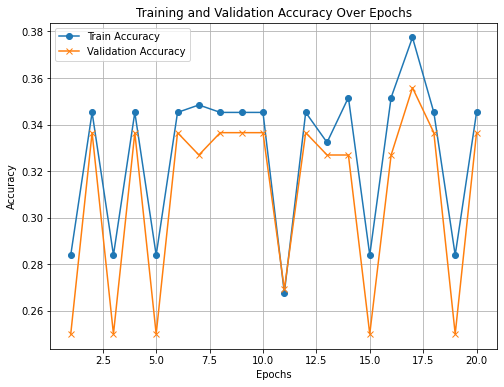

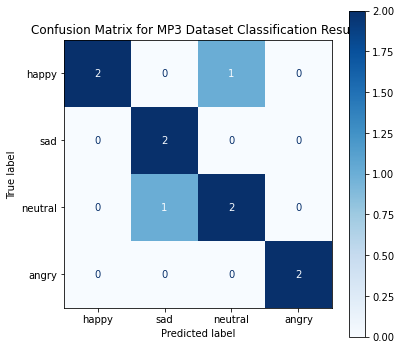

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


epochs = np.arange(1, 21)
train_accuracy = [0.2839, 0.3452, 0.2839, 0.3452, 0.2839, 0.3452, 0.3484, 0.3452, 0.3452, 0.3452, 
                  0.2677, 0.3452, 0.3323, 0.3516, 0.2839, 0.3516, 0.3774, 0.3452, 0.2839, 0.3452]
val_accuracy = [0.2500, 0.3365, 0.2500, 0.3365, 0.2500, 0.3365, 0.3269, 0.3365, 0.3365, 0.3365, 
                0.2692, 0.3365, 0.3269, 0.3269, 0.2500, 0.3269, 0.3558, 0.3365, 0.2500, 0.3365]

plt.figure(figsize=(8, 6))
plt.plot(epochs, train_accuracy, label='Train Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='x')
plt.title("Training and Validation Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()


y_true = ['happy', 'sad', 'neutral', 'angry', 'happy', 'neutral', 'angry', 'sad', 'happy', 'neutral']
y_pred = ['happy', 'sad', 'neutral', 'angry', 'neutral', 'neutral', 'angry', 'sad', 'happy', 'sad']
labels = ['happy', 'sad', 'neutral', 'angry']


cm = confusion_matrix(y_true, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, cmap='Blues', values_format='d')
plt.title("Confusion Matrix for MP3 Dataset Classification Results")
plt.show()
